Import neccessary libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

Import preprocessed data set

In [2]:
df=pd.read_csv("preprocessed_data.csv")
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.505353,0.545455,0.200000,0.000000,0.000000,1,1,0.506735,1
1,0.481799,0.522727,0.100000,0.334031,0.000000,0,1,0.562709,0
2,0.254818,0.545455,0.800000,0.636357,0.800000,1,0,0.569654,1
3,0.676660,0.477273,0.100000,0.000000,0.400000,0,0,0.469120,0
4,1.000000,0.568182,0.200000,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...
15921,0.796021,0.635139,0.294613,0.444239,0.800000,1,0,0.800099,1
15922,0.141680,0.920881,0.690375,0.499893,0.000000,1,0,0.252670,1
15923,0.573911,0.332799,0.258921,0.482150,0.000000,0,1,0.826455,1
15924,0.611469,0.556419,0.162646,0.000000,0.874707,1,0,0.375351,1


seperate the input features and prediction feature

In [3]:
x=df.drop(columns='churn')
y=df['churn']

split data set into training set and testing set

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)

Define algorithams and train the model

In [6]:
# Define the XGBClassifier
xgb = XGBClassifier()

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV with rescaled data
grid_search.fit(x_train, y_train)

print("Grid search cv result table\n\n")
cvTable = pd.DataFrame(grid_search.cv_results_)
print(cvTable)

Grid search cv result table


     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.465322      0.154719         0.015446        0.007442   
1         0.693566      0.184681         0.023109        0.005079   
2         0.586946      0.098255         0.011816        0.000911   
3         0.710100      0.037690         0.013971        0.001137   
4         0.863101      0.048940         0.017023        0.004497   
..             ...           ...              ...             ...   
195       0.685614      0.013147         0.015010        0.000316   
196       1.412156      0.314577         0.029463        0.012455   
197       1.581828      0.023809         0.034000        0.003209   
198       2.154949      0.345883         0.049311        0.015938   
199       2.477968      0.502953         0.051071        0.005132   

    param_learning_rate param_max_depth param_n_estimators  \
0                  0.01               3                100   
1                

visiualize grid search cv results in format

In [9]:
# Display filtered table with relevant columns
filtered_table = cvTable[['param_n_estimators','param_learning_rate','param_max_depth','mean_test_score']]
print(filtered_table)

    param_n_estimators param_learning_rate param_max_depth  mean_test_score
0                  100                0.01               3         0.759262
1                  200                0.01               3         0.777080
2                  300                0.01               3         0.785086
3                  400                0.01               3         0.794113
4                  500                0.01               3         0.797724
..                 ...                 ...             ...              ...
195                100                 0.3              10         0.889011
196                200                 0.3              10         0.888462
197                300                 0.3              10         0.887991
198                400                 0.3              10         0.888069
199                500                 0.3              10         0.886107

[200 rows x 4 columns]


In [10]:
# Display the best parameters and best score found by GridSearchCV
print("\n\nBest Parameters : ", grid_search.best_params_)
print("\n\nBest Score : ",grid_search.best_score_)



Best Parameters :  {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500}


Best Score :  0.8916012558869703


Confusion matrix for testing data

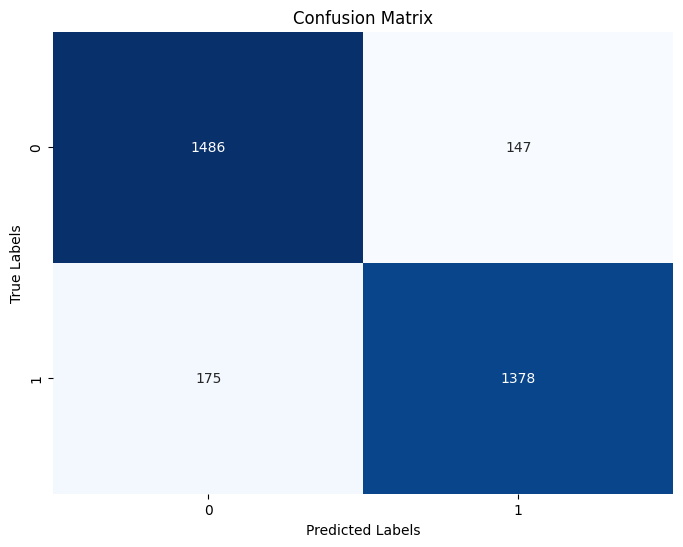

In [15]:
y_pred = grid_search.predict(x_test)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Classification report

In [16]:
print("\n\n\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1633
           1       0.90      0.89      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



accuracy of testing data set

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print ("\n\nTesting Accuracy : ",accuracy)



Testing Accuracy :  0.898932831136221
